# The 144 symmetries of the Littlewood-Richardson coefficients of $SL_3$:  Sage Notebook

*[Emmanuel BRIAND](http://emmanuel.jean.briand.free.fr) & [Mercedes ROSAS](http://personal.us.es/mrosas)*.

Departamento Matemática Aplicada I & Departamento de Álgebra.

Universidad de Sevilla.

<div style = "font-size: 8px;">march 11, 2019. v1.0.  April 9, 2020: v2.0.

http://emmanuel.jean.briand.free.fr/publications/the144symmetries.ipynb

Partially supported by MTM2016-75024-P and FEDER, and Junta de Andalucia under grants P12-FQM-2696 and FQM-333.</div>

#### Abstract
We perform explicit calculations with **sagemath** to show that the Littlewood-Richardson coefficients associated to the representation theory of $SL_3$ afford a group of $144$ linear symmetries, which is  more than the $12$ well-known symmetries. 

Our calculations also show that this group of symmetries acts transitively on the set of chambers of the corresponding chamber complex. As a consequence, the data of the group and of only one chamber (with the formula for the LR on this chamber) completely describe these LR coefficients.

---

## The Littlewood-Richardson coefficients associated to $SL_3$ and their symmetries

The Littlewood-Richardson coefficients associated to the representations of $SL_3$ (i.e. arising as the multiplicities in the tensor products of irreducible representations) are the coefficients
$$c_{(\lambda_1, \lambda_2),(\mu_1, \mu_2)}^{(\nu_1, \nu_2, \nu_3)}.$$ 
We see this family of coefficients as a function $C$ of the parts 
$$\lambda_1, \lambda_2, \mu_1, \mu_2, \nu_1, \nu_2$$
since $\nu_3=\lambda_1+\lambda_2+\mu_1+\mu_2-\nu_1-\nu_2$ (indeed, otherwise $c_{(\lambda_1, \lambda_2),(\mu_1, \mu_2)}^{(\nu_1, \nu_2, \nu_3)}=0$). That is, we define:
$$
C(\lambda_1, \lambda_2, \mu_1, \mu_2, \nu_1, \nu_2) =  c_{(\lambda_1, \lambda_2),(\mu_1, \mu_2)}^{(\nu_1, \nu_2, \nu_3)}
$$
when $\lambda$, $\mu$, $\nu$ are partitions, $0$ otherwise.


The symmetries of this family of Littlewood-Richardson coefficients are the invertible linear maps from $\mathbb{Z}^6$ to iself such that $C \circ F = C$.

Known symmetries are:
* $T$: replae all three partitions with their complements in rectangles
* $S$: exchange $\lambda$ and $\mu$.
* $U$: take complement $\nu$ and $\lambda$ in a rectangle and exchanges them.

## Piecewise quasipolynomial formulas for the Littlewood-Richardson coefficients of $SL_3$

The LR coefficients of $SL_3$ are a subfamily of the LR coefficients for $GL_3$. These later are the LR coefficients indexed by three partitions with length at most $3$: 
$$c_{(\lambda_1, \lambda_2,\lambda_3),(\mu_1, \mu_2,\mu_3)}^{(\nu_1, \nu_2, \nu_3)}$$
Piecewise polynomial formulas for the $GL_3$-LR coefficients were given in parag. 5 in: 
<pre style="font-family: 'Andale Mono', 'Bitstream Vera Sans Mono', monospace; font-size: 12px;">Rassart, Etienne, 
A polynomiality property for Littlewood-Richardson coefficients
J. Combin. Theory Ser. A, V 107(2). 2004. P 161--179
doi:10.1016/j.jcta.2004.04.003
</pre>

Rassart's paper is in open access and can be consulted [here](http://dx.doi.org/10.1016/j.jcta.2004.04.003).

The domains of polynomiality for the piecewise polynomial formulas for the $GL_3$-LR coefficients are the maximal cones ("chambers") of a fan ("the **Chamber Complex**") described in Table 1 of Rassart's paper, p.177.

By restriction we get the Chamber Complex for the $SL_3$-LR coefficients: it is the trace of the Chamber Complex for the $GL_3$-LR coefficients in the subspace of $\mathbb{R}^9$ defined by $\lambda_3=\mu_3=0$. This amounts to 
* remove the two generators $a_1$ and $a_2$ that appear in each chamber. They are the only two generators not contained in this subspace
* and forget for each ray $(\lambda_1, \lambda_2, \lambda_3 | \mu_1, \mu_2, \mu_3 | \nu_1, \nu_2, \nu_3)$ its coordinates $\lambda_3$ and $\mu_3$ (these two being 0), and $\nu_3$ (the latter being determined by the other coordinates). 
 
Below we describe the Chamber Complex obtained this way for the $SL_3$-LR coefficients. Namely, we define:
* the minimal generators of the rays of the Chamber Complex, 
* the chambers (each is given by the rays it contains; they generate it the chamber as a cone)
* and the polynomial formulas $P_1, \ldots, P_{18}$. These polynomial formulas may involve $\nu_3$: we define a function `normal_form` to calculate their expression in the other coordiantes only, when it is necessary.

In [1]:
## The minimal generators of the rays of the Chamber Complex for $SL_3$
## -----------------------------------
b  = (2,1, 2,1, 3,2)
c  = (1,1, 1,1, 2,1)
f  = (1,0, 1,0, 1,1)
d1 = (1,1, 1,0, 1,1)
d2 = (1,0, 1,1, 1,1)
e1 = (1,1, 0,0, 1,1)
e2 = (0,0, 1,1, 1,1)
g1 = (1,0, 0,0, 1,0)
g2 = (0,0, 1,0, 1,0)

ray_names   = ['b', 'c', 'f', 'd1', 'd2', 'e1', 'e2', 'g1', 'g2']
ray_to_name = { tuple(eval(r)): r for r in ray_names} 
## Example: 
#      ray_to_name[(2,1,21,3,2)]    is    'b' 

## The chambers 
##--------------------------------------
K = {
    1: ( 'b', 'c', 'd1', 'd2', 'e1', 'e2'),
    2: ( 'b', 'c', 'd1', 'd2', 'g1', 'g2'),
    3: ( 'b', 'c', 'e1', 'e2', 'g1', 'g2'),
    4: ( 'b', 'd1', 'd2', 'e1', 'e2', 'f'),
    5: ( 'b', 'd1', 'd2', 'f', 'g1', 'g2'),
    6: ( 'b', 'e1', 'e2', 'f', 'g1', 'g2'),
    7: ( 'b', 'c', 'd1', 'd2', 'e1', 'g1'),
    8: ( 'b', 'c', 'd1', 'd2', 'e2', 'g2'),
    9: ( 'b', 'c', 'd1', 'e1', 'e2', 'g2'),
   10: ( 'b', 'c', 'd2', 'e1', 'e2', 'g1'),
   11: ( 'b', 'c', 'd1', 'e1', 'g1', 'g2'),
   12: ( 'b', 'c', 'd2', 'e2', 'g1', 'g2'),
   13: ( 'b', 'd1', 'd2', 'e1', 'f', 'g1'),
   14: ( 'b', 'd1', 'd2', 'e2', 'f', 'g2'),
   15: ( 'b', 'd1', 'e1', 'f', 'g1', 'g2'),
   16: ( 'b', 'd2', 'e2', 'f', 'g1', 'g2'),
   17: ( 'b', 'd1', 'e1', 'e2', 'f', 'g2'),
   18: ( 'b', 'd2', 'e1', 'e2', 'f', 'g1')    
}

rays_to_chamber = { L:i for (i,L) in K.items()} 
## example: 
#     ray_to_chamber[( 'b', 'd2', 'e1', 'e2', 'f', 'g1')]     is     18

## Polynomial formulas in each chamber.
#------------------------------------------
var('L1 L2 M1 M2 N1 N2 N3') # stand for lambda_1, ..., nu_3
P = [ 0 ,              # formula number 0: outside the supporting cone
1 - L2 - M2 + N1,      # chamber K1
1 + N2 - N3,           # chamber K2
1 + L1 + M1 - N1,      # ...
1 + N1 - N2,
1 + L2 + M2 - N3,
1 + N3,
1 + M1 - N3,
1 + L1 - N3,
1 + L1 - L2,
1 + M1 - M2,
1 - L2 + N2,
1 - M2 + N2,
1 - L1 + N1,
1 - M1 + N1,
1 + M2,
1 + L2,
1 + L1 + M2 - N2,
1 + L2 + M1 - N2]

## These formulas can be expressed in terms only of L1, L2, M1, M2, N1, N2 (without N3).
normal_form = lambda x: x.subs( N3 = L1 + L2 + M1 + M2 - N1 - N2) 

## CHECK
## We check by visual inspection that the formulas were copied correctly from Rassart's paper
##----------
tab = r'\begin{array}{lll}'
tab += r'\\'.join(LatexExpr(r'\kappa_{%s}'%i) 
                  + '&'
                  + LatexExpr(', '.join(K[i]).replace('1', '_1').replace('2','_2'))
                  + '&'
                  + str(p).replace('L',r'\lambda_').replace('N',r'\nu_').replace('M',r'\mu_') 
                for (i, p) in enumerate(P) if i!=0)
tab += r'\end{array}'
show(LatexExpr(tab))

\begin{array}{lll}\kappa_{1} & b, c, d_1, d_2, e_1, e_2 & -\lambda_2 - \mu_2 + \nu_1 + 1\\\kappa_{2} & b, c, d_1, d_2, g_1, g_2 & \nu_2 - \nu_3 + 1\\\kappa_{3} & b, c, e_1, e_2, g_1, g_2 & \lambda_1 + \mu_1 - \nu_1 + 1\\\kappa_{4} & b, d_1, d_2, e_1, e_2, f & \nu_1 - \nu_2 + 1\\\kappa_{5} & b, d_1, d_2, f, g_1, g_2 & \lambda_2 + \mu_2 - \nu_3 + 1\\\kappa_{6} & b, e_1, e_2, f, g_1, g_2 & \nu_3 + 1\\\kappa_{7} & b, c, d_1, d_2, e_1, g_1 & \mu_1 - \nu_3 + 1\\\kappa_{8} & b, c, d_1, d_2, e_2, g_2 & \lambda_1 - \nu_3 + 1\\\kappa_{9} & b, c, d_1, e_1, e_2, g_2 & \lambda_1 - \lambda_2 + 1\\\kappa_{10} & b, c, d_2, e_1, e_2, g_1 & \mu_1 - \mu_2 + 1\\\kappa_{11} & b, c, d_1, e_1, g_1, g_2 & -\lambda_2 + \nu_2 + 1\\\kappa_{12} & b, c, d_2, e_2, g_1, g_2 & -\mu_2 + \nu_2 + 1\\\kappa_{13} & b, d_1, d_2, e_1, f, g_1 & -\lambda_1 + \nu_1 + 1\\\kappa_{14} & b, d_1, d_2, e_2, f, g_2 & -\mu_1 + \nu_1 + 1\\\kappa_{15} & b, d_1, e_1, f, g_1, g_2 & \mu_2 + 1\\\kappa_{16} & b, d_2, e_2, f, g_1, g_2 & \lambda_2 + 1\\\kappa_{17} & b, d_1, e_1, e_2, f, g_2 & \lambda_1 + \mu_2 - \nu_2 + 1\\\kappa_{18} & b, d_2, e_1, e_2, f, g_1 & \lambda_2 + \mu_1 - \nu_2 + 1\end{array}

# Symmetries of the rays

We calculate group of all linear symmetries that stabilize the set of the ray generators of the chamber complex, $\{b,c,f,d_1,d_2,e_1,e_2,g_1,g_2\}$. We define a function that associates to a family of vectors am edge-colored graph that has the dsame group of symmetries.

In [2]:
from sage.plot.colors import rainbow

def edge_colored_graph(v,vertex_labels = None):
    r"""
    Return the complete graph whose vertices are [0.. N-1] where N is the length of the sequence 
    of vectors v,
    and whose edge colors are the coefficients in the matrix V.pseudoinverse()*V
    where V is the matrix wlhose columns are the vectors in v.
    The vectors in v are assumed to span the space.
    
    EXAMPLE:
    
    To plot the graph:
    K.plot(color_by_label = True)
    
    To remove all edges with the same color as  (i,j)
    K1 = K.delete_edges(filter(lambda p,q: K.edge_label(p,q) == K.edge_label(i,j),
    K.edges(labels=False)  ))
    
    """
    V = matrix(v).transpose()
    N = V.ncols()
    #if V.rank() < V.nrows():
    #    raise ValueError("The vectors don't span the whole space.")
    W = V.pseudoinverse()*V
    K = graphs.CompleteGraph(N)
    for (i,j) in K.edges(labels=False):
        K.set_edge_label(i, j, W[i,j])
    if vertex_labels != None:
        K.relabel({i: label for (i, label) in enumerate(vertex_labels) })
    return K

def symmetries_of_vectors(v, vertex_labels = None):
    r"""
    Return the group of symmetries (permutation group) of a sequence of vectors. 
    
    INPUT:
    
    - v : list of vectors or tuples.
    - vertex_labels:  list or tuple of indices used for the vectors. 
        The vector with index i in v is labelled with the i-th term of `vertex_labels`.
        
    REFERENCE:    
        
    Polyhedral representation conversion up to symmetries
    David Bremner, Mathieu Dutour Sikiric, Achill Schuermann
    CRM Proceedings & Lecture Notes 48, AMS, 2009, pp. 45-71
    arXiv:math/0702239 [math.MG]
    """
    K = edge_colored_graph(v, vertex_labels)
    aut = K.automorphism_group(edge_labels = True)
    return aut

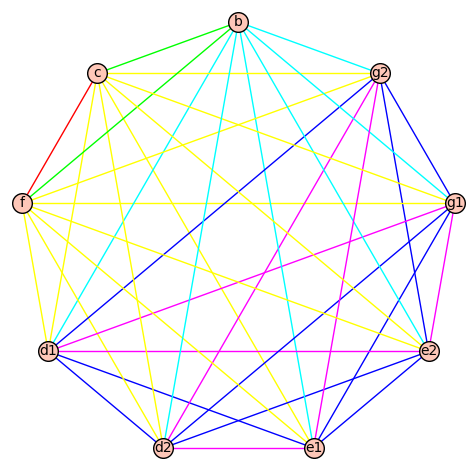

In [3]:
rays = map(eval,ray_names)
#latex_names = ['$b$','$c$','$d_1$','$e_2$','$g_1$','$g_2$','$e_1$','$d_2$','$f$']
H = edge_colored_graph(rays,vertex_labels = ray_names)
H.plot(color_by_label = True)

Changing the order of vertices and colors, we get a picture that makes crystal clear the automorphism group of this colored graph.

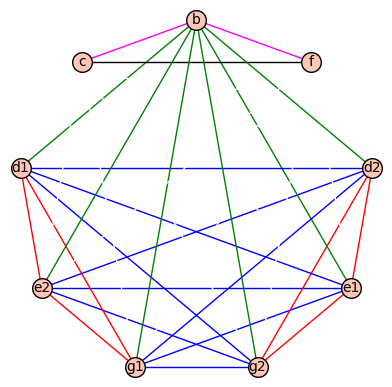

In [4]:
other_order = ['b', 'c', 'd1', 'e2', 'g1', 'g2', 'e1', 'd2', 'f']
#latex_names = ['$b$','$c$','$d_1$','$e_2$','$g_1$','$g_2$','$e_1$','$d_2$','$f$']
H = edge_colored_graph(map(eval, other_order),vertex_labels = other_order)
H.plot(color_by_label = {H.edge_label('b','d1'): 'green',
                        H.edge_label('b','c'): 'magenta',
                        H.edge_label('c','f'): 'black',
                        H.edge_label('c','d1'): 'white',
                        H.edge_label('d1','d2'): 'blue',
                        H.edge_label('d1','e2'): 'red'})

The automorphisms of the ray generators are thus the permutations of the ray generators that fulfill all three conditions below:
* fix $b$ (only element in all circuits of size 3 or 4),
* fix or swap $c$ and $f$ (only elements other than $b$ in the only circuit of size $3$)
* fix or swap the sets $\{d_1, e_2, g_1\}$ and $\{d_2, e_1, g_2\}$.  The permutations that behave this way make a group $S_2[S_3] = S_3$ &#x2240; $S_2$ (wreath product). 

At the end, we get as group of automorphisms  $G = S_2 \times S_2[S_3]$, which has $2 \times 2 \times 6^2=144$ elements. This is the group of all symmetries of the matroid.

## The group of automorphisms of  the rays, as a permutation group.

In [5]:
ray_names

['b', 'c', 'f', 'd1', 'd2', 'e1', 'e2', 'g1', 'g2']

Below we define permutations $v$, $s$, $x$, $y$ of the ray generators.

In [6]:
## The group of all permutations of the rays
##-------
SR = SymmetricGroup(ray_names)

In [7]:
# v is the generator of S2 in S2 x (S3 wr S2). It swaps c and f.
v = SR( [ ('c','f') ] ) 

# s below swaps the subsets {d1, e2, g1} and {d2, e1, g2}
# (It is induced by the symmetry of the LR coefficients swapping lambda and mu)
s = SR( [('d1','d2'), ('e1','e2') ,('g1','g2')])

# The permutations x and y below generate the permutations of {d2, e1, g2}
y = SR( [ ('d2','e1') ] )
x = SR( [ ('e1','g2') ])

We can now represent the group of all automorphisms of the rays. It is generated by the automorphisms $x, y, s, v$.

In [8]:
# Group of all symmetries of the rays
GM = PermutationGroup([v, s, x, y])
GM.cardinality()

144

We look for better sets of generators. We prefer the known symmetries of the LR coefficients as generators. It is straightforward to check that the involution corresponding to $S$ (swapping $\lambda$ and $\mu$) is $S$.

The duality involution is
$$T: 
(\lambda_1, \lambda_2 | \mu_1, \mu_2 | \nu_1, \nu_2) \longmapsto
(\lambda_1, \lambda_1 - \lambda_2 | \mu_1, \mu_1 - \mu_2 | \lambda_1+\mu_1-\nu_3, \lambda_1+\mu_1 - \nu_2)
$$
and permutes the rays as 
$$t = (d_1, d_2) (e_1, g_1) (e_2, g_2) (c,f).$$
The symmetry $c_{\lambda,\mu}^{\nu}=c_{\nu^{\square}, \mu}^{\lambda^{\square}}$ 
is 
$$ U: (\lambda_1, \lambda_2, \mu_1, \mu_2, \nu_1, \nu_2) \longmapsto (\nu_1 -\nu_3, \nu_1 - \nu_2, \mu_1, \mu_2, \nu_1, \nu_1 -\lambda_2)$$
and 
permutes the rays as 
$$ u = (d_1, g_2) (d_2, e_2) (e_1, g_1).$$


In [9]:
t = SR( [('d1','d2') ,('e1','g1') ,('e2','g2') ,('c','f')] ) 
u = SR( [('d1', 'g2'),('d2','e2'),('e1','g1')] )
# HM: The group of known symmetries of the LR, as symmetries of the rays.
# This group is isomorphic to S2 x S3, its cardinality is 12.
HM = PermutationGroup([s, t, u ])
HM.cardinality()                

12

In [10]:
# Let us try to adjoin one automorphism of the rays, say: x
HMx = PermutationGroup([s,t, u, x])
HMx.cardinality()

144

In [11]:
HMx == GM

True

**Conclusion:** the group of all automorphisms of the rays is generated by the automorphisms induced by the known symmetries of the LR coefficients, and $x$.

We will also express the generators $v,s,x,y$ in terms of the generators $s,t,u,x$. This provides a certificate of the fact that the groups they generate are equal.

In [12]:
HMx.gens()

[('e1','g2'),
 ('d1','d2')('e1','e2')('g1','g2'),
 ('d1','g2')('d2','e2')('e1','g1'),
 ('c','f')('d1','d2')('e1','g1')('e2','g2')]

The generators of $HMx$ have been re--ordered by Sage as: $(x,s,u,t)$.

In [13]:
HMx.gens() == [x,s,u,t]

True

In [14]:
gap(HMx).Factorization(HMx(v))

x4*x1*x2*x1

In [15]:
for a in [v,y]:
    w = gap(HMx).Factorization(HMx(a)).str()
    for (i,z) in zip([1..4],['x','s','u','t']):
        w = w.replace('x{}'.format(i),z)
    print(w)

t*x*s*x
u*s*x*s*u


So $v = txsx$ and $y=usxsu$. This can be checked by hand or with Sage.

In [16]:
v == t*x*s*x

True

In [17]:
y == u*s*x*s*u

True

## Lifting the matroid automorphisms to symmetries of the Littlewood-Richardson coefficients.

To check that all automorphisms of the rays lift to symmetries of the LR coefficients, it is enougfh to check that $x$ does. Indeed, the other generators $s$, $t$, $u$ do since they are induced by the known symmetries $S$, $T$, $U$.

We first check that $x$ permutes the chambers of the Chamber Complex. It is enough to check that $x$ permutes their sets of generators.

In [18]:
L = []
# We check that x sends each chamber to a chamber
# If it is not the case, an error is raised
for (i, k) in K.items():
    try:
        L.append(rays_to_chamber[tuple(sorted(map(x, k)))])
    except ValueError:
        raise ValueError("The image of chamber %i is not a chamber of the chamber complex"%i)
        
# Let g be the permutation of the chambers obtained this way
g = Permutation(L)

# We show its decomposition into disjoint cycles
show(g.cycle_tuples())

[(1, 8),
 (2, 7),
 (3,),
 (4, 14),
 (5, 13),
 (6,),
 (9,),
 (10, 12),
 (11,),
 (15,),
 (16, 18),
 (17,)]

Now we also check that $X$ preserves the piecewise quasipolynomial function. Let $B_1$ be te canonical basis of $\mathbb{R}^6$ and $B_2$ be the basis $(c, f, e_1, e_2, g_1, g_2)$. 
Let $Q$ be the matrix whose columns are the elements of the basis $B_2$, and let $M_1(X)$ and $M_2(X)$ be the matrices of $X$ with respect to these two bases. We have:
$$M_1(X) = Q \cdot M_2(X) \cdot Q^{-1}$$
Since $X$ just swaps the basis elements $e_1$ and $g_2$, its matrix w.r.t $B_2$ is:

In [19]:
SB2 = SymmetricGroup([ 'c','f','e1','e2','g1','g2']) # permutations of the elements of basis B2
M2X = SB2([('e1','g2')]).matrix()
show(M2X)

[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 1 0 0]
[0 0 0 0 1 0]
[0 0 1 0 0 0]

In [20]:
Q = matrix([c,f,e1,e2,g1,g2]).transpose()
M1X = Q * M2X * Q.inverse()
M1X

[ 1  0  1  0  0 -1]
[ 0  1  1  0  0 -1]
[ 0  0  0  0  0  1]
[ 0  0  0  1  0  0]
[ 0  0  0  0  1  0]
[ 0  0  1  0  0  0]

We now get $X$ in formulas:

In [21]:
X_as_formula = M1X * vector([L1, L2, M1, M2, N1, N2])
show(X_as_formula)

(L1 + M1 - N2, L2 + M1 - N2, N2, M2, N1, M1)

In [22]:
show(LatexExpr(str(X_as_formula).replace('L',r'\lambda_').replace('M',r'\mu_').replace('N', r'\nu_')))

(\lambda_1 + \mu_1 - \nu_2, \lambda_2 + \mu_1 - \nu_2, \nu_2, \mu_2, \nu_1, \mu_1)

For each chamber $\kappa_i$, we must check that $P_i \circ X^{-1}$ coincides with $P_{g(i)}$. Note that $X$ is an involution. We just need to check that $P_i \circ X$ coincides with $P_g(i)$. This is what we do now.

In [23]:
# we define the action of $X$ on polynomials
def X_on_polynomial(P):    
    return  P.subs(dict( zip((L1, L2, M1, M2, N1, N2), X_as_formula) ))

## example:
X_on_polynomial(L1+L2)

L1 + L2 + 2*M1 - 2*N2

In [24]:
for (i, k) in K.items():
    if normal_form(X_on_polynomial(P[i])) != normal_form(P[g(i)]):
        print('The composition of P%s with X does not coincide with P%s'%(i, g(i)))
        break
else:
    print('Checking successfull.')

Checking successfull.


This proves that $X$ is indeed a symmetry of the LR coefficients, and thus that the group of all symmetries of the $SL_3$-LR coefficients is the group generated by $X$ and the $12$ known symmetries, that is isomorphic to the group of symmetries of the rays matroid, isomorphic to $S_2 \times (S_3 \wr S_2)$, and has order 144.

---

## Transitivity of the action on the chambers.

Finally we check that the action is transitive! For this we generate the orbit of the first chamber, and count its elements. 

In [25]:
# We must realize GM as a subgroup of the symmetric group of all the rays, else it can't act on b
GM_as_subgroup = SR.subgroup(GM.gens())
print(len(GM_as_subgroup.orbit(K[1], action = 'OnSets'))) 

18


All the 18 chambers  are indeed in the orbit of the first one. That is, the group action is transitive.

---

## Additional material: the group of symmetries in the Gap Database
For running the following command, the Gap database of groups needs to be installed in SAGE
. 
We ask for the *Gap ID code* of the group, in the GAP database of Small groups (https://gap-packages.github.io/smallgrp/). This code is the pair ($\omega$, i) for the $i$-th group of order $\omega$.

In [26]:
GM.group_id()

[144, 186]

This group is the $186$-th in the [list of groups of order 144 from the GAP database of groups](https://groupprops.subwiki.org/wiki/Groups_of_order_144).

---

## Additional material: checking with the LR calculator

We use [Anders Buch's Littlewood-Richardson calculator](http://doc.sagemath.org/html/en/reference/libs/sage/libs/lrcalc/lrcalc.html) to check extensively (all pairs $\lambda$, $\mu$ with sizes up to $14$) that $X$ is a symmetry.

In [27]:
import sage.libs.lrcalc.lrcalc as lrcalc
   
def padded(lam, N):   
    r"""
    Return the list of length N obtained from lam by adding trailing 0s.
    """
    if len(lam) > N:
        raise ValueError("Partition of length %s , can't be padded in length %s"%(len(lam), N))
    return list(lam) + [0]*(N - len(lam))
    
size_max = 14
for size_lam in [1..size_max]:
    for lam in Partitions(size_lam, max_length =2 ):
        lam = padded(lam, 2)
        for size_mu in [size_lam..size_max]:
            for mu in Partitions(size_mu, max_length = 2):
                mu = padded(mu, 2)
                for (nu, lr) in lrcalc.mult(lam, mu).items():
                    if len(nu) <= 3:
                        nu = padded(nu, 3)
                        vec = lam + mu + nu[:2]       # The 6 coordinates of the triple of partitions
                        Xvec = list(M1X*vector(vec) ) # The 6 coordinates of its image under X
                        Xlam, Xmu, Xnu = Xvec[0:2], Xvec[2:4], Xvec[4:6]
                        Xnu.append(add(Xlam) + add(Xmu) - add(Xnu))
                        if lr != lrcalc.lrcoef(Xnu, Xlam, Xmu): #nu first 
                            raise ValueError("Checking not successfull", lam, mu, nu, Xlam, Xmu, Xnu)
else:
    print("Checking successfull")

Checking successfull


---
<pre>End of the notebook.</pre>